<!--Información del curso-->
<img align="left" style="padding-right:10px;" src="figuras/logo_ciencia_datos.png">

<br><br><center><h1 style="font-size:2em;color:#2467C0">Caso de estudio: Indicadores de Desarrollo Mundial</h1></center>
<br>
<table>
<col width="550">
<col width="450">
<tr>
<td><img src="figuras/North_South_divide.svg" align="middle" style="width:550px;height:360px;"/></td>
<td>
El conjunto de  Indicadores del desarrollo mundial  obtenido del Banco Mundial  contiene más de mil indicadores anuales de desarrollo económico de cientos de países de todo el mundo.<br>
</td>
</tr>
</table>

#  1: Exploración inicial del conjunto de datos

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
#plt.style.use('seaborn-whitegrid')

In [2]:
#Cargar el archivo datos/Indicators.csv
data = pd.read_csv('datos/Indicators.csv')

<div class="alert alert-success">
¿Cuántas filas y columnas tiene el archivo?
</div>

In [3]:
data.shape

(5656458, 6)

<div class="alert alert-success">
Muestre las primeras 10 filas para tener una idea de los datos
</div>

In [5]:
data.tail(10)

,CountryName,CountryCode,IndicatorName,IndicatorCode,Year,Value
5656448,Zimbabwe,ZWE,Strength of legal rights index (0=weak to 12=s...,IC.LGL.CRED.XQ,2015,5.0
5656449,Zimbabwe,ZWE,Tax payments (number),IC.TAX.PAYM,2015,49.0
5656450,Zimbabwe,ZWE,Time required to build a warehouse (days),IC.WRH.DURS,2015,448.0
5656451,Zimbabwe,ZWE,Time required to enforce a contract (days),IC.LGL.DURS,2015,410.0
5656452,Zimbabwe,ZWE,Time required to get electricity (days),IC.ELC.TIME,2015,106.0
5656453,Zimbabwe,ZWE,Time required to register property (days),IC.PRP.DURS,2015,36.0
5656454,Zimbabwe,ZWE,Time required to start a business (days),IC.REG.DURS,2015,90.0
5656455,Zimbabwe,ZWE,Time to prepare and pay taxes (hours),IC.TAX.DURS,2015,242.0
5656456,Zimbabwe,ZWE,Time to resolve insolvency (years),IC.ISV.DURS,2015,3.3
5656457,Zimbabwe,ZWE,Total tax rate (% of commercial profits),IC.TAX.TOTL.CP.ZS,2015,32.8


Looks like it has different indicators for different countries with the year and value of the indicator. 

<div class="alert alert-success">
¿Cuántos países diferentes hay en la lista? 
</div>

In [6]:
len(data['CountryName'].unique())

247

<div class="alert alert-success">
¿Son el mismo número de codigos que el de los países? 
</div>

In [7]:
len( data['CountryCode'].unique())

247

<div class="alert alert-success">
¿Cuántos indicadores hay? 
</div>

In [8]:
len( data['IndicatorName'].unique())

1344

<div class="alert alert-success">
¿Cuántos años de datos se tienen? 
</div>

In [9]:
len(data['Year'].unique())

56

<div class="alert alert-success">
¿Cuál es el rango de años?
</div>

In [13]:
print(data['Year'].min()," to ",data['Year'].max())

1960  to  2015



#  2: Gráficas  básicas con Matplotlib


<div class="alert alert-success">
Hacer una máscara para seleccionar el indicador CO2 emissions (metric tons per capita), una para Estados Unidos y una para México
</div>

In [14]:
#Definir primero los strings que deben contener las columnas str_indicator, str_USA y str_MX
#NOTA: es necesio usar el simbolo "\" antes de "("
str_indicator = 'CO2 emissions \(metric' #this will serve to filter the data 
str_USA = 'USA' #this will serve to filter the data 
str_MEX = 'MEX'#this will serve to filter the data 


In [32]:
#Definir las máscaras  mask_indicator , mask_USA y mask_MX
# .str.contains -> prueba si el patrón se encuentra contenidos en una cadena de una serie.

mask_indicator = data['IndicatorName'].str.contains(str_indicator) 

mask_USA = data['CountryCode'].str.contains(str_USA)

mask_MEX = data['CountryCode'].str.contains(str_MEX)

In [16]:
# Aplicar las máscaras para encontrar los datos para USA (data_USA_C02) y MX (data_MX_C02)
data_USA_C02 = data[(mask_indicator) & (mask_USA) ]
data_USA_C02.head()

,CountryName,CountryCode,IndicatorName,IndicatorCode,Year,Value
22232,United States,USA,CO2 emissions (metric tons per capita),EN.ATM.CO2E.PC,1960,15.999779
48708,United States,USA,CO2 emissions (metric tons per capita),EN.ATM.CO2E.PC,1961,15.681256
77087,United States,USA,CO2 emissions (metric tons per capita),EN.ATM.CO2E.PC,1962,16.013937
105704,United States,USA,CO2 emissions (metric tons per capita),EN.ATM.CO2E.PC,1963,16.482762
134742,United States,USA,CO2 emissions (metric tons per capita),EN.ATM.CO2E.PC,1964,16.968119


In [17]:
data_MEX_C02 = data[ (mask_indicator) & (mask_MEX) ]
data_MEX_C02.head()

,CountryName,CountryCode,IndicatorName,IndicatorCode,Year,Value
15235,Mexico,MEX,CO2 emissions (metric tons per capita),EN.ATM.CO2E.PC,1960,1.653382
40674,Mexico,MEX,CO2 emissions (metric tons per capita),EN.ATM.CO2E.PC,1961,1.657750
68468,Mexico,MEX,CO2 emissions (metric tons per capita),EN.ATM.CO2E.PC,1962,1.569744
97033,Mexico,MEX,CO2 emissions (metric tons per capita),EN.ATM.CO2E.PC,1963,1.582305
125944,Mexico,MEX,CO2 emissions (metric tons per capita),EN.ATM.CO2E.PC,1964,1.716861


<div class="alert alert-success">
Hacer una grafica para mostrar como ha cambiado el indicador durante los años para USA
</div>

In [36]:
# Obtener los valores de los años
años_USA = data_USA_C02['Year'].values
# Obtener los valores del indicador
co2_USA = data_USA_C02['Value'].values

Se observará que las emisiones per cápita se han reducido un poco con el tiempo.

In [37]:
años_USA

array([1960, 1961, 1962, 1963, 1964, 1965, 1966, 1967, 1968, 1969, 1970,
       1971, 1972, 1973, 1974, 1975, 1976, 1977, 1978, 1979, 1980, 1981,
       1982, 1983, 1984, 1985, 1986, 1987, 1988, 1989, 1990, 1991, 1992,
       1993, 1994, 1995, 1996, 1997, 1998, 1999, 2000, 2001, 2002, 2003,
       2004, 2005, 2006, 2007, 2008, 2009, 2010, 2011], dtype=int64)

In [39]:
co2_USA

array([15.99977916, 15.68125552, 16.0139375 , 16.48276215, 16.96811858,
       17.45172525, 18.12107301, 18.59831788, 19.08938916, 19.85794566,
       21.11125227, 20.98020348, 21.74864198, 22.51058213, 21.50293038,
       20.40222407, 21.15761537, 21.53248401, 21.97300469, 21.78043698,
       20.78648774, 19.76676417, 18.59049523, 18.57154371, 18.97675027,
       18.88231274, 18.72072272, 19.35033442, 20.01041341, 20.07576978,
       19.32336817, 19.06223666, 19.14555576, 19.36346258, 19.37655644,
       19.29565986, 19.52789051, 19.71427574, 19.6151546 , 19.74781478,
       20.20761476, 19.65619321, 19.63919577, 19.57623905, 19.68358135,
       19.61027504, 19.11613882, 19.23746045, 18.48923375, 17.1923791 ,
       17.48479218, 17.02021634])

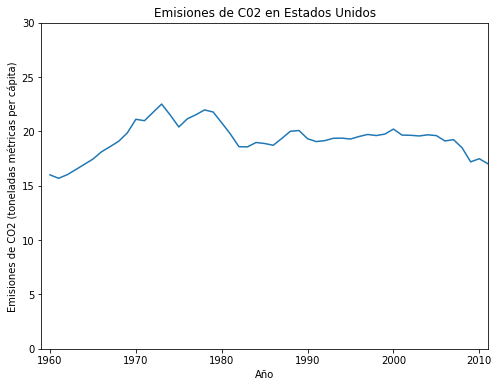

In [44]:
#Estilo Matlab

plt.figure(figsize=(8,6))  
plt.plot(años_USA, co2_USA )

# Etiqueta de los ejes
plt.xlabel('Año')
plt.ylabel('Emisiones de CO2 (toneladas métricas per cápita)')

#Titulo de la figura
plt.title('Emisiones de C02 en Estados Unidos')

# Comenzar en 0
# First two digits defund the limit of axis "x"
# Last two digits defund the limit of axis "y"
#plt.axis([1959,2011 ,0,25])

plt.axis([1959,2011 ,0,30])
plt.show()

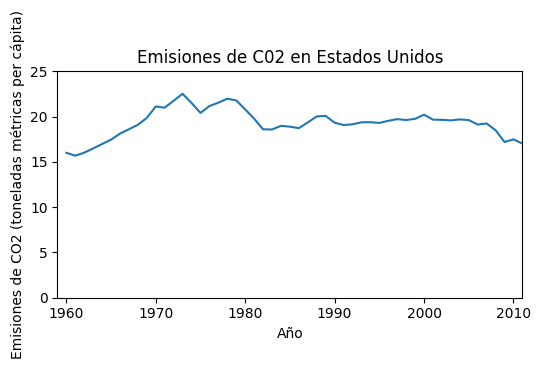

In [45]:
# Estilo orientado a objetos. 

# Crear una figura(fig)  y el espacio (ax) para graficar
fig, ax = plt.subplots(figsize=(6,3), dpi=100)

# Crear la grafica
ax.plot(años_USA, co2_USA )

#Opciones de visualización
ax.set(title='Emisiones de C02 en Estados Unidos', xlabel='Año', ylabel='Emisiones de CO2 (toneladas métricas per cápita)', 
       xlim=(1959, 2011), ylim=(0,25))

plt.show()

<div class="alert alert-success">
Hacer una grafica para mostrar como ha cambiado el indicador durante los años para México
</div>

In [46]:
# Obtener los valores de los años
años_MEX = data_MEX_C02['Year'].values
# Obtener los valores del indicador
co2_MEX = data_MEX_C02['Value'].values


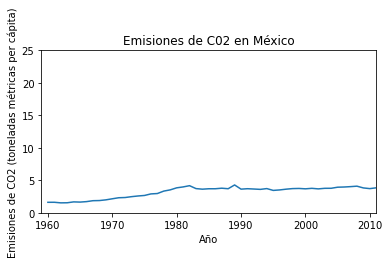

In [47]:
# Estilo Matlab.

plt.figure(figsize=(6,3))  
plt.plot(años_MEX, co2_MEX )

# Etiqueta de los ejes
plt.xlabel('Año')
plt.ylabel('Emisiones de CO2 (toneladas métricas per cápita)')

#Titulo de la figura
plt.title('Emisiones de C02 en México')

# Comenzar en 0
plt.axis([1959, 2011,0,25])

plt.show()

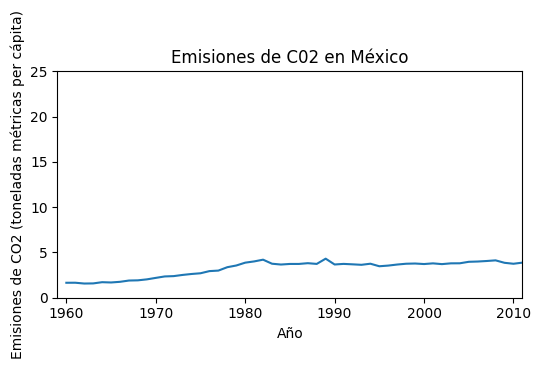

In [48]:
# Estilo orientado a objetos. 

# Crear una figura(fig)  y el espacio (ax) para graficar
fig, ax = plt.subplots(figsize=(6,3), sharex=True, dpi=100)
# Call plot() method on the appropriate object
ax.plot(años_MEX, co2_MEX )

ax.set(title='Emisiones de C02 en México', xlabel='Año', ylabel='Emisiones de CO2 (toneladas métricas per cápita)', 
       xlim=(1959, 2011), ylim=(0,25))

plt.show()

<div class="alert alert-success">
Hacer ambas graficas en una misma figura pero separadas
</div>

#####  Estilo Matlab

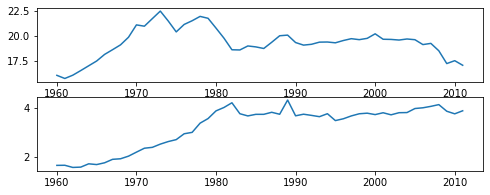

In [49]:
# Crear la figura para graficar
plt.figure(figsize=(8,3))  

# Crear cada uno de los espacios para graficar
# Use subplot(2, 1, 1) -> (filas, columns, número de espacio actual)
plt.subplot(2, 1, 1)
plt.plot(años_USA, co2_USA)

# create the second panel and set current axis
plt.subplot(2, 1, 2)
plt.plot(años_MEX, co2_MEX)
plt.show()

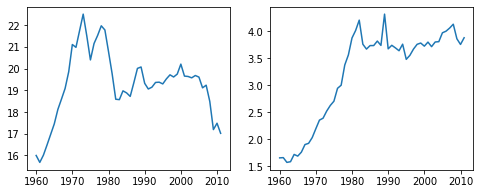

In [50]:
# Crear la figura para graficar
plt.figure(figsize=(8,3))  

# Crear cada uno de los espacios para graficar
# Use subplot(1, 2, 1) -> (filas, columns, número de espacio actual)
plt.subplot(1, 2, 1)
plt.plot(años_USA, co2_USA)

# create the second panel and set current axis
plt.subplot(1, 2, 2)
plt.plot(años_MEX, co2_MEX)
plt.show()

#####  Estilo orientado a objetos 

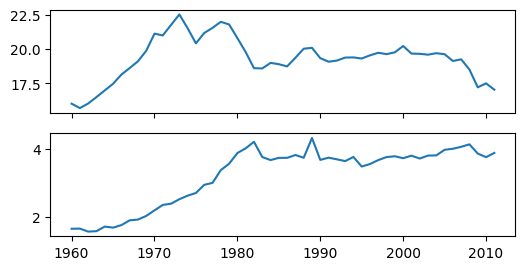

In [51]:
# Crear una figura(fig)  con dos espacios(ax) para graficar
fig, ax = plt.subplots(2,1, figsize=(6,3), sharex=True, dpi=100)
# Call plot() method on the appropriate object
ax[0].plot(años_USA, co2_USA )
ax[1].plot(años_MEX, co2_MEX )
plt.show()

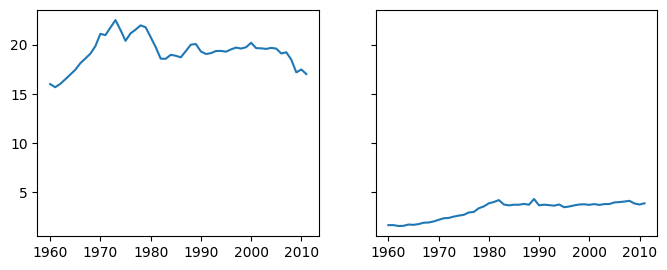

In [52]:
# Crear una figura(fig)  con dos espacios(ax) para graficar
fig, ax = plt.subplots(1,2, figsize=(8,3), sharey=True, dpi=100)
# Call plot() method on the appropriate object
ax[0].plot(años_USA, co2_USA )
ax[1].plot(años_MEX, co2_MEX )
plt.show()

<div class="alert alert-success">
Combinar las cuarvas  anteriores en una sola grafica
</div>

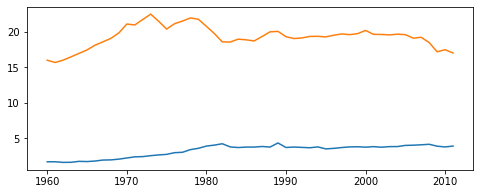

In [53]:
plt.figure(figsize=(8,3))  
plt.plot(años_MEX, co2_MEX)
plt.plot(años_USA, co2_USA)
plt.show()

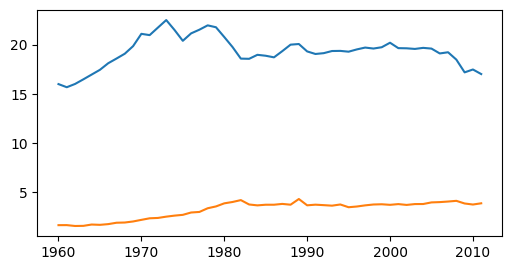

In [54]:
# Crear una figura(fig)  y el espacio (ax) para graficar
fig, ax = plt.subplots(figsize=(6,3), sharex=True, dpi=100)
# Call plot() method on the appropriate object
ax.plot(años_USA, co2_USA )
ax.plot(años_MEX, co2_MEX )
plt.show()

<div class="alert alert-success">
Utilizar opciones de visualización
</div>

#### Color y estilo de linea


Ejemplos de tipo de color 
* **color='blue'**           # nombre
* **color='g'**              # codigo corto (rgbcmyk)
* **color='0.75'**          # Escala de grises 0 a 1
* **color='#FFDD44'**     # Codigo HEX (RRGGBB from 00 to FF)
* **color=(1.0,0.2,0.3)**   # RGB, de 0 a 1
* **color='chartreuse'**     # nombres de colores en HTML


Ejemplos de estilo de linea 

* **linestyle='solid'**
* **linestyle='dashed'**
* **linestyle='dashdot'** 
* **linestyle='dotted'** 

Ejemplos de estilo de linea (manera corta)
* **linestyle='-'**  # solid
* **linestyle='--'** # dashed
* **linestyle='-.'** # dashdot
* **linestyle=':'**  # dotted

Combinación de tipo de linea y color

* **'-g'**   # solid green
* **'--c'** # dashed cyan
* **'-.k'** # dashdot black
* **':r'**  # dotted red

Leyendas:

<img align="left" style="padding-right:10px;" src="figuras/leyenda_opciones.png">

Tipos de marcadores:

<img align="left" style="padding-right:10px;" src="figuras/marcadores.png">

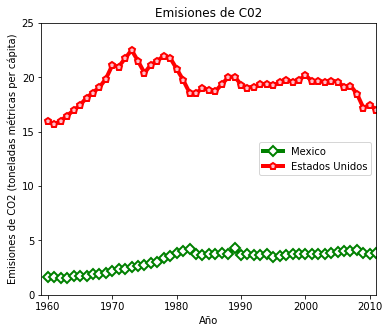

In [55]:
#Estilo Matlab

plt.figure(figsize=(6,5))  

plt.plot(años_MEX, co2_MEX, linestyle='solid', color='green', markersize=7, linewidth=4,
         markerfacecolor='white', markeredgecolor='green', markeredgewidth=2 , marker='D', label='Mexico')

plt.plot(años_USA, co2_USA, linestyle='solid',color='red', markersize=7, linewidth=4,
         markerfacecolor='pink', markeredgecolor='red', markeredgewidth=2 , marker='p', label='Estados Unidos')

# Etiqueta de los ejes
plt.xlabel('Año')
plt.ylabel('Emisiones de CO2 (toneladas métricas per cápita)')

#Titulo de la figura
plt.title('Emisiones de C02')

#Leyenda
plt.legend(loc='center right');

# Comenzar en 0
plt.axis([1959, 2011,0,25])
plt.show()

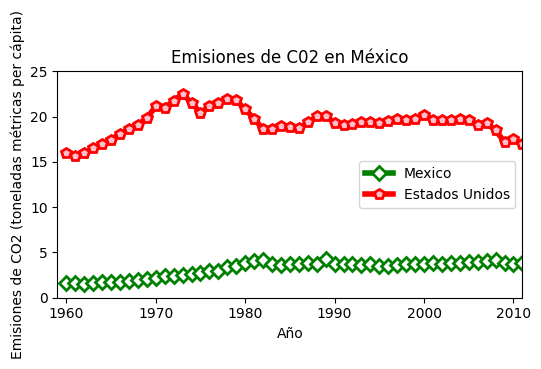

In [56]:
#Estilo orientado a objetos

fig, ax = plt.subplots(figsize=(6,3), dpi=100)

ax.plot(años_MEX, co2_MEX, linestyle='solid', color='green', markersize=7, linewidth=4,
         markerfacecolor='white', markeredgecolor='green', markeredgewidth=2 , marker='D', label='Mexico')

ax.plot(años_USA, co2_USA, linestyle='solid',color='red', markersize=7, linewidth=4,
         markerfacecolor='pink', markeredgecolor='red', markeredgewidth=2 , marker='p', label='Estados Unidos')

ax.set(title='Emisiones de C02 en México', xlabel='Año', ylabel='Emisiones de CO2 (toneladas métricas per cápita)', 
       xlim=(1959, 2011), ylim=(0,25))

#Leyenda
ax.legend(loc='center right');



<div class="alert alert-success">
Hacer  un histograma de las cantidades de emisión de C02  para Estados Unidos (estilo Matlab ) y México (estilo Orientado a Objetos) por separado
</div>

In [57]:
# Datos USA
hist_data_USA = data_USA_C02['Value'].values

In [58]:
print(hist_data_USA)

[15.99977916 15.68125552 16.0139375  16.48276215 16.96811858 17.45172525
 18.12107301 18.59831788 19.08938916 19.85794566 21.11125227 20.98020348
 21.74864198 22.51058213 21.50293038 20.40222407 21.15761537 21.53248401
 21.97300469 21.78043698 20.78648774 19.76676417 18.59049523 18.57154371
 18.97675027 18.88231274 18.72072272 19.35033442 20.01041341 20.07576978
 19.32336817 19.06223666 19.14555576 19.36346258 19.37655644 19.29565986
 19.52789051 19.71427574 19.6151546  19.74781478 20.20761476 19.65619321
 19.63919577 19.57623905 19.68358135 19.61027504 19.11613882 19.23746045
 18.48923375 17.1923791  17.48479218 17.02021634]


In [94]:
#data_USA_C02

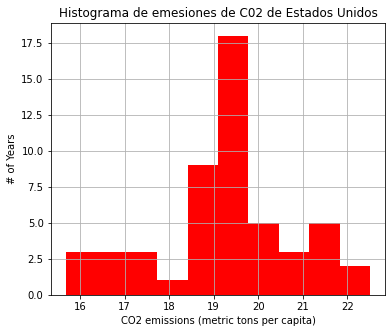

In [92]:
#estilo Matlab 
plt.figure(figsize=(6,5))  
plt.hist(hist_data_USA, 10, density=False, facecolor='red')

#plt.xlabel(data_USA_C02['IndicatorName'].iloc[0] )
plt.xlabel(data_USA_C02['IndicatorName'].iloc[0] )
plt.ylabel('# of Years')
plt.title('Histograma de emesiones de C02 de Estados Unidos')

plt.grid(True)

plt.show()

In [60]:
hist_data_MEX = data_MEX_C02['Value'].values
hist_data_MEX

array([1.65338229, 1.6577498 , 1.56974442, 1.58230541, 1.71686145,
       1.68627772, 1.75894378, 1.89969863, 1.92231424, 2.02857903,
       2.1924533 , 2.3518283 , 2.38751037, 2.51893011, 2.62322658,
       2.70191888, 2.9405645 , 2.99742683, 3.37216466, 3.55856773,
       3.87206065, 4.01024514, 4.20187643, 3.7559687 , 3.6664087 ,
       3.73113507, 3.73145674, 3.8147309 , 3.73455936, 4.31312048,
       3.67122327, 3.73651326, 3.688685  , 3.63580804, 3.75696324,
       3.47667542, 3.55038438, 3.66651975, 3.75443847, 3.77822065,
       3.7205883 , 3.79545238, 3.7115515 , 3.79759166, 3.80358132,
       3.96761935, 3.99784272, 4.05576204, 4.12698811, 3.8571496 ,
       3.75209082, 3.87610761])

In [96]:
# Otherwise, let's look at all the data
hist_data_MEX = data_MEX_C02['Value'].values
hist_data_MEX

array([1.65338229, 1.6577498 , 1.56974442, 1.58230541, 1.71686145,
       1.68627772, 1.75894378, 1.89969863, 1.92231424, 2.02857903,
       2.1924533 , 2.3518283 , 2.38751037, 2.51893011, 2.62322658,
       2.70191888, 2.9405645 , 2.99742683, 3.37216466, 3.55856773,
       3.87206065, 4.01024514, 4.20187643, 3.7559687 , 3.6664087 ,
       3.73113507, 3.73145674, 3.8147309 , 3.73455936, 4.31312048,
       3.67122327, 3.73651326, 3.688685  , 3.63580804, 3.75696324,
       3.47667542, 3.55038438, 3.66651975, 3.75443847, 3.77822065,
       3.7205883 , 3.79545238, 3.7115515 , 3.79759166, 3.80358132,
       3.96761935, 3.99784272, 4.05576204, 4.12698811, 3.8571496 ,
       3.75209082, 3.87610761])

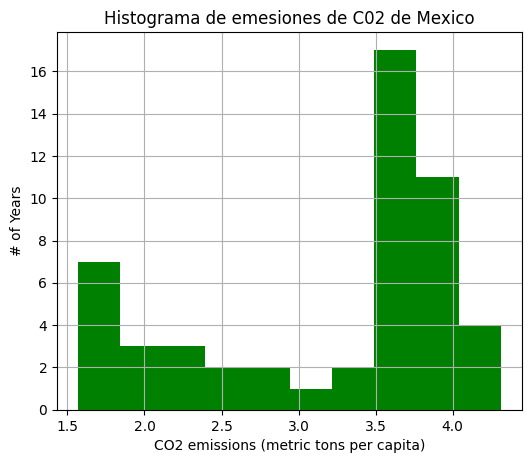

In [62]:
#estilo Orientado a Objetos
fig, ax = plt.subplots(figsize=(6,5), dpi=100)

# the histogram of the data
ax.hist(hist_data_MEX,10, density=False, facecolor='green')

ax.set(title='Histograma de emesiones de C02 de Mexico', xlabel= data_MEX_C02['IndicatorName'].iloc[0] , 
       ylabel='# of Years')

ax.grid(True)

plt.show()

<div class="alert alert-success">
Hacer un histograma de las cantidades de emisión de C02  para Estados Unidos y México juntos
</div>

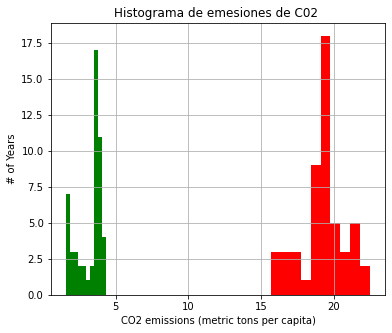

In [63]:
plt.figure(figsize=(6,5))  

plt.hist(hist_data_USA, 10, density=False, facecolor='red')
plt.hist(hist_data_MEX, 10, density=False, facecolor='green')

plt.xlabel(data_MEX_C02['IndicatorName'].iloc[0] )
plt.ylabel('# of Years')
plt.title('Histograma de emesiones de C02 ')

plt.grid(True)
plt.show()

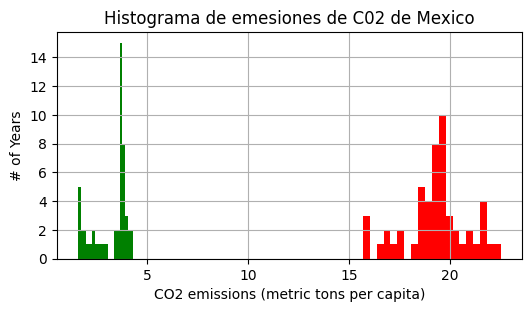

In [64]:
# subplots returns a touple with the figure, axis attributes.
fig, ax = plt.subplots(figsize=(6,3), dpi=100)

ax.hist(hist_data_USA, 20, density=False, facecolor='red')
ax.hist(hist_data_MEX, 20, density=False, facecolor='green')

ax.set(title='Histograma de emesiones de C02 de Mexico', xlabel= data_MEX_C02['IndicatorName'].iloc[0] , 
       ylabel='# of Years')

ax.grid(True)
plt.show()

Algunas variaciones utilizando el estilo Orientado a Objetos

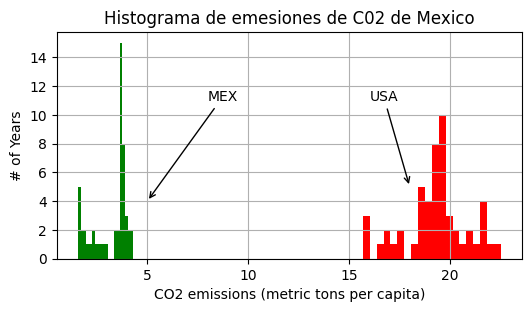

In [65]:
# subplots returns a touple with the figure, axis attributes.
fig, ax = plt.subplots(figsize=(6,3), dpi=100)

ax.annotate("USA",
            xy=(18, 5), 
            xytext=(16, 11), 
            arrowprops=dict(arrowstyle="->",
                            connectionstyle="arc3"),
            )

ax.annotate("MEX",
            xy=(5, 4), 
            xytext=(8, 11), 
            arrowprops=dict(arrowstyle="->",
                            connectionstyle="arc3"),
            )


ax.hist(hist_data_USA, 20, density=False, facecolor='red')
ax.hist(hist_data_MEX, 20, density=False, facecolor='green')

ax.set(title='Histograma de emesiones de C02 de Mexico', xlabel= data_MEX_C02['IndicatorName'].iloc[0] , 
       ylabel='# of Years')

ax.grid(True)

plt.show()

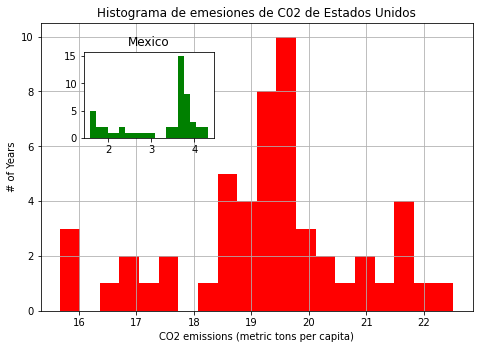

In [66]:
fig = plt.figure()
ax0 = fig.add_axes([0,0,1,1])
ax1 = fig.add_axes([0.1, 0.6, 0.3, 0.3])

ax0.hist(hist_data_USA, 20, density=False, facecolor='red')
ax1.hist(hist_data_MEX, 20, density=False, facecolor='green')

ax0.set(title='Histograma de emesiones de C02 de Estados Unidos', xlabel= data_MEX_C02['IndicatorName'].iloc[0] , 
       ylabel='# of Years')

ax1.set(title='Mexico')

ax0.grid(True)


plt.show()

<div class="alert alert-success">
Muestre  el  GPD en los diferentes años para  Estados Unidos, así como la relación entre el  GPD y las emisiones de CO2 en Estados Unidos

</div>


In [67]:
#Defina strings que deben contener las columnas str_indicator_GDP y str_USA  
str_indicator_GDP = 'GDP per capita \(constant 2005'
str_USA = 'USA'


In [68]:
#Defina las máscaras  mask_indicator_GDP y mask_USA 
mask_indicator_GDP = data['IndicatorName'].str.contains(str_indicator_GDP) 
mask_USA = data['CountryCode'].str.contains(str_USA)

In [69]:
# Aplique las máscaras para encontrar los datos para USA (data_USA_GDP)
data_USA_GDP = data[(mask_indicator_GDP) & (mask_USA) ]
data_USA_GDP.tail()

,CountryName,CountryCode,IndicatorName,IndicatorCode,Year,Value
5018182,United States,USA,GDP per capita (constant 2005 US$),NY.GDP.PCAP.KD,2010,43961.168477
5194861,United States,USA,GDP per capita (constant 2005 US$),NY.GDP.PCAP.KD,2011,44324.944522
5370008,United States,USA,GDP per capita (constant 2005 US$),NY.GDP.PCAP.KD,2012,45008.614113
5527438,United States,USA,GDP per capita (constant 2005 US$),NY.GDP.PCAP.KD,2013,45660.733802
5637323,United States,USA,GDP per capita (constant 2005 US$),NY.GDP.PCAP.KD,2014,46405.247065


Relación entre el  GPD y las emisiones de CO2 en Estados Unidos


In [70]:
#Mostrar el rango de años para  data_USA_GDP y data_USA_C02
print("GDP Min Year = ", data_USA_GDP['Year'].min(), "max: ", data_USA_GDP['Year'].max())
print("CO2 Min Year = ", data_USA_C02['Year'].min(), "max: ", data_USA_C02['Year'].max())

GDP Min Year =  1960 max:  2014
CO2 Min Year =  1960 max:  2011


Tenemos 3 años adicionales de datos de GDP, así que recortémoslos para que el diagrama de dispersión tenga arreglos de igual longitud para comparar (esto es realmente requerido por el diagrama de dispersión)

In [71]:
data_USA_GDP_trunc = data_USA_GDP[data_USA_GDP['Year'] < 2012]
print(len(data_USA_GDP_trunc))
print(len(data_USA_C02))

52
52


In [72]:
#Datos
X= data_USA_GDP_trunc['Value'].values
Y= data_USA_C02['Value'].values


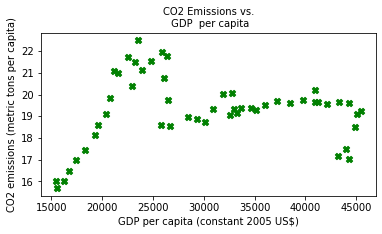

In [73]:
# Estilo Matlab
plt.figure(figsize=(6,3))  

plt.scatter(X, Y, c= 'green' , s = 40 , marker='X')

plt.title('CO2 Emissions vs.\n GDP  per capita',fontsize=10)
plt.xlabel(data_USA_GDP_trunc['IndicatorName'].iloc[0],fontsize=10)
plt.ylabel(data_USA_C02['IndicatorName'].iloc[0],fontsize=10);

plt.show()

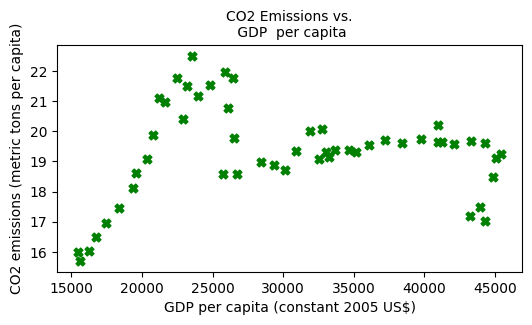

In [74]:
# Estilo Orientado a Objetos

fig, ax = plt.subplots(figsize=(6,3), dpi=100)

ax.scatter(X, Y, c= 'green' , s = 40 , marker='X')

ax.set_title('CO2 Emissions vs.\n GDP  per capita',fontsize=10)
ax.set_xlabel(data_USA_GDP_trunc['IndicatorName'].iloc[0],fontsize=10)
ax.set_ylabel(data_USA_C02['IndicatorName'].iloc[0],fontsize=10)

plt.show()

<div class="alert alert-success">
Muestre  el total de emisiones de C02 utilizando una grafica de barras para los siguientes países: Estados Unidos, México, Italia, China y la India  
</div>

In [97]:
#Defina strings que deben contener las columnas  
str_indicator = 'CO2 emissions \(metric'
str_USA = 'USA'
str_MEX = 'MEX'
str_ITA = 'ITA'
str_CHN = 'CHN'
str_IND = 'IND'

#Defina las máscaras   
mask_indicator = data['IndicatorName'].str.contains(str_indicator) 
mask_USA = data['CountryCode'].str.contains(str_USA)
mask_MEX = data['CountryCode'].str.contains(str_MEX)
mask_ITA = data['CountryCode'].str.contains(str_ITA)
mask_CHN = data['CountryCode'].str.contains(str_CHN)
mask_IND = data['CountryCode'].str.contains(str_IND)

In [98]:
# Aplicar las máscaras para encontrar los datos para cada país  
val_USA = data[(mask_indicator) & (mask_USA) ]['Value'].sum() 
val_MEX = data[(mask_indicator) & (mask_MEX) ]['Value'].sum() 
val_ITA = data[(mask_indicator) & (mask_ITA) ]['Value'].sum() 
val_CHN = data[(mask_indicator) & (mask_CHN) ]['Value'].sum() 
val_IND = data[(mask_indicator) & (mask_IND) ]['Value'].sum() 

In [77]:
#Valores 
x_values = [ str_USA, str_MEX, str_ITA, str_CHN,str_IND  ]
y_values = [  val_USA, val_MEX, val_ITA , val_CHN ,val_IND  ]

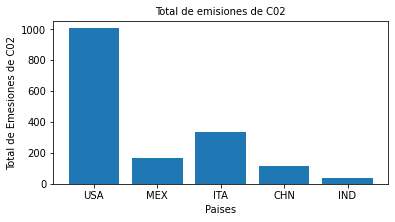

In [78]:
#Estilo Matlab
plt.figure(figsize=(6,3))  

plt.bar(x_values, y_values)          

plt.title('Total de emisiones de C02',fontsize=10)
plt.xlabel('Paises',fontsize=10)
plt.ylabel('Total de Emesiones de C02',fontsize=10);

plt.show()

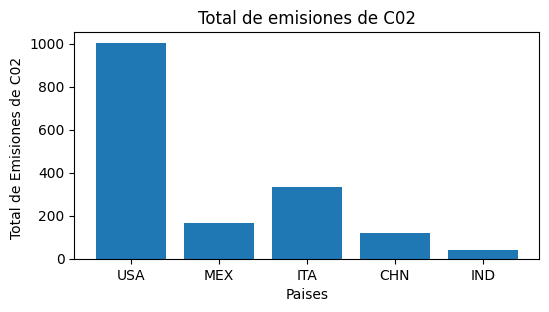

In [79]:
#Estilo orientado a objetos
fig, ax = plt.subplots(figsize=(6,3), dpi=100)

ax.bar(x_values, y_values)          
ax.set(title='Total de emisiones de C02', xlabel= 'Paises' , ylabel='Total de Emisiones de C02 ')

plt.show()


<div class="alert alert-success">
En una misma grafica de barras, muestre las emisiones de C02 para los años 1990,2000 y 2010 para  Estados Unidos y China 
</div>

In [80]:
#Valores para USA y CHN en los diferentes años
val_USA_1990= data[(mask_indicator) & (mask_USA) &  (data['Year'] == 1990) ]['Value'].values[0]
val_CHN_1990= data[(mask_indicator) & (mask_CHN) &  (data['Year'] == 1990) ]['Value'].values[0]

val_USA_2000=data[(mask_indicator) & (mask_USA) &  (data['Year'] == 2000) ]['Value'].values[0]
val_CHN_2000=data[(mask_indicator) & (mask_CHN) &  (data['Year'] == 2000) ]['Value'].values[0]

val_USA_2010=data[(mask_indicator) & (mask_USA) &  (data['Year'] == 2010) ]['Value'].values[0]
val_CHN_2010=data[(mask_indicator) & (mask_CHN) &  (data['Year'] == 2010) ]['Value'].values[0];

In [81]:
# Datos para configuración
datos=[ [val_USA_1990, val_USA_2000, val_USA_2010], 
       [val_CHN_1990, val_CHN_2000, val_CHN_2010]   ]
labels = ['1990', '2000','2010']
x_vals = np.arange(len(labels))  # Referencias para ubicación 
ancho = 0.25  # Ancho de las barras

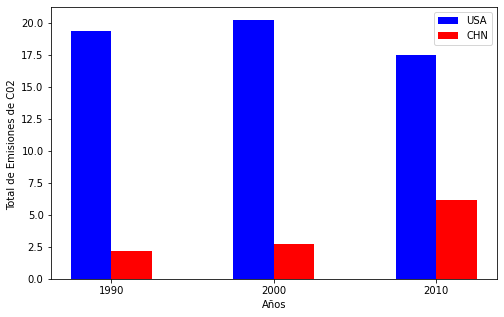

In [82]:
#Estilo Matlab
plt.figure(figsize=(8,5))  

plt.bar(x_vals - ancho/2, datos[0], color = 'b', width = ancho,  label='USA')
plt.bar(x_vals + ancho/2, datos[1], color = 'r', width = ancho,  label='CHN')

plt.xticks( x_vals , labels )
plt.xlabel('Años')
plt.ylabel('Total de Emisiones de C02 ')
plt.legend()

plt.show()

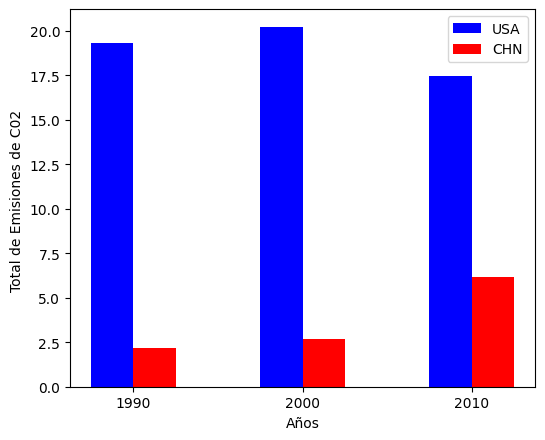

In [83]:
#Estilo Orientado a Objetos
fig, ax = plt.subplots(figsize=(6,5), dpi=100)

ax.bar(x_vals - ancho/2, datos[0], color = 'b', width = ancho,  label='USA')
ax.bar(x_vals + ancho/2, datos[1], color = 'r', width = ancho,  label='CHN')

ax.set_xticks(x_vals)
ax.set_xticklabels(labels)
ax.legend()
ax.set(xlabel= 'Años' , ylabel='Total de Emisiones de C02 ')

plt.show()